# Statistical Analysis - Part II

## Regression
General steps for building a regression model:
 - Start with a hypothesis or specific goal (e.g. predicting BMI from age)
 - Identify the feature you want to predict, the response variable (e.g. BMI)
 - Identify the predictors - age, sex, heart rate (the input data)
 - Do you expect a linear relationship?
 - Visualize variables using plot functions

## Regression - Creating a Model
When creating a regression model, it is helpful to start with the simplest model (single variable) and then gradually increase the complexity. 

Simple linear regression is used for the two-variable models. With linear regression, we examine the explanatory variable and the response variable, and try to fit a linear equation to the data: , where  is the predicited value and b is the regression coefficient.

Can we predict BMI from total cholesterol? There are two ways to find the slope (regression coefficient) of single-variable linear regression models.

(If you need to recreate the tables from Part I of the lecture, you can run the below code)

Download dataset.

In [ ]:
!gdown --id 1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz

Downloading...
From: https://drive.google.com/uc?id=1OnIYNtdVIVIgrxdDkL3L0chpG8DpWTjz
To: /content/fram.txt
100% 1.46M/1.46M [00:00<00:00, 95.1MB/s]


In [ ]:
 %matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from numpy import NaN
from numpy.polynomial.polynomial import polyfit
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import MNLogit
import statsmodels.api as sm
import scipy.stats as stat
from statsmodels.tools.tools import add_constant

In [ ]:
fram = pd.read_csv("fram.txt", delimiter=",")
fram_2_11 = fram.iloc[:, 1:11]
fram_noNaN = fram_2_11.dropna()

1. Use the backslash (which is lstsq in Numpy) operator. The data sets must not contain any missing values, so we must use the table we created using the dropna function. 


In [ ]:
# np.linalg.lstsq(fram_noNaN.TOTCHOL.to_numpy(), fram_noNaN.BMI.to_numpy())
x, residuals, rank, s = np.linalg.lstsq(fram_noNaN.TOTCHOL.to_numpy().reshape(-1, 1), fram_noNaN.BMI.to_numpy().reshape(-1,1))
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[0.1036542]])

2. Use the statsmodels.api.OLS function. There is a parameter `missing` that can setting how we should handle missing values, so we can use the original data. Before carrying out the command, assign the total cholesterol and BMI arrays to variables X and Y, respectively.


In [ ]:
Y = fram_noNaN.BMI.to_numpy()
X = fram_noNaN.TOTCHOL.to_numpy()
model = sm.OLS(Y, X, missing='drop')
results = model.fit()
b = results.params
b

array([0.1036542])

These two methods should produce the same results for b. In terms of predicting BMI from total cholesterol, we now have the equation , where  is estimated BMI, b is the regression coefficient, and X is total cholesterol. Create an array containing the predicted BMI values using this equation.


In [ ]:
Y1 = b*X.reshape(-1,1)
Y1

array([[20.21256944],
       [25.91355056],
       [26.95009258],
       ...,
       [15.85909294],
       [20.31622364],
       [24.87700854]])

To improve the regression model, we want to include an intercept term. In order to do this, a column of ones must be added to independent variable matrix.


In [ ]:
X_ones = np.concatenate((np.ones_like(fram_noNaN.TOTCHOL.to_numpy().reshape(-1, 1)),fram_noNaN.TOTCHOL.to_numpy().reshape(-1, 1)), axis=1)
X_ones


array([[  1., 195.],
       [  1., 250.],
       [  1., 260.],
       ...,
       [  1., 153.],
       [  1., 196.],
       [  1., 240.]])

Now repeat the regress command with the new X_ones variable.


In [ ]:
Y = fram_noNaN.BMI.to_numpy().reshape(-1,1)
b2, residuals, rank, s = np.linalg.lstsq(X_ones, Y)
b2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[2.40277932e+01],
       [7.54887293e-03]])

The first term in the b array is the y-intercept for the linear regression line, and the second term is the slope. We now have the equation . Use these values to create an array which contains the new values for . 


In [ ]:
Y2 = b2[1, 0]*X_ones[:,1]+b2[0,0];
Y2

array([25.49982342, 25.91501143, 25.99050016, ..., 25.18277076,
       25.50737229, 25.8395227 ])

How do the two estimates for  compare? And how do these compare to that actual BMI data? Use the scatter function to compare. Also, calculate the value for each relationship.


Text(50, 28, 'R^2 = 0.00710569')

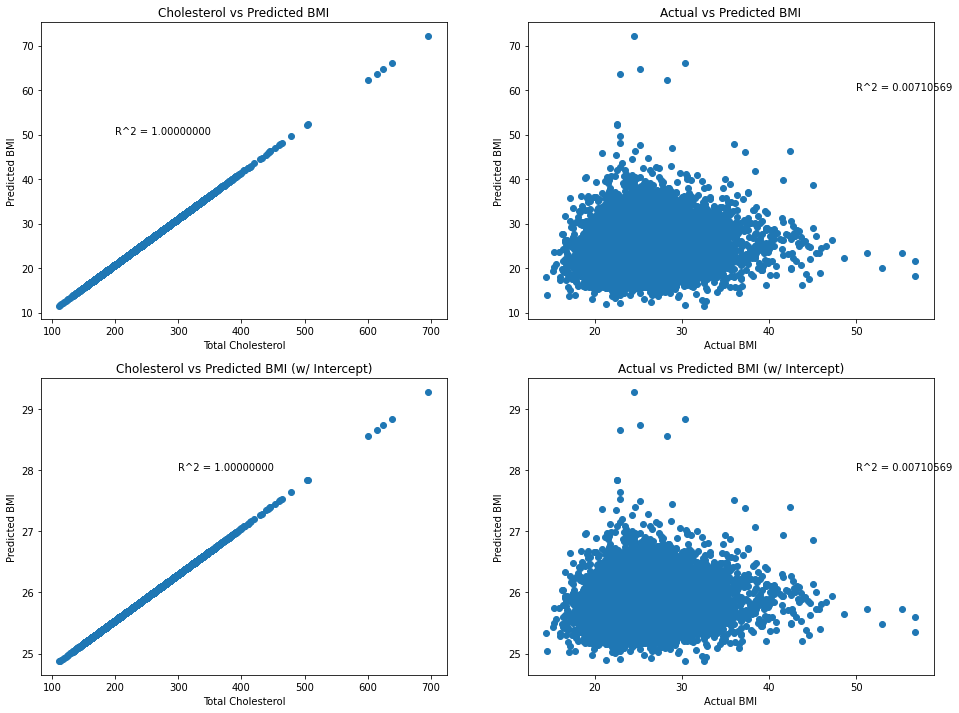

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
plt.scatter(X,Y1)
plt.xlabel('Total Cholesterol')
plt.ylabel('Predicted BMI')
plt.title('Cholesterol vs Predicted BMI')
R_squared_1 = pd.DataFrame(np.concatenate([X.reshape(-1, 1), Y1.reshape(-1,1)], axis=1)).dropna().corr()[0][1] ** 2

plt.text(200,50,'R^2 = {r:.8f}'.format(r=R_squared_1))

plt.subplot(2,2,2)
plt.scatter(Y,Y1)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI')
R_squared_2 = pd.DataFrame(np.concatenate([Y.reshape(-1, 1), Y1.reshape(-1,1)], axis=1)).dropna().corr()[0][1] ** 2
plt.text(50,60,'R^2 = {r:.8f}'.format(r=R_squared_2))

plt.subplot(2,2,3)
plt.scatter(X,Y2)
plt.xlabel('Total Cholesterol')
plt.ylabel('Predicted BMI')
plt.title('Cholesterol vs Predicted BMI (w/ Intercept)')
R_squared_3 = pd.DataFrame(np.concatenate([X.reshape(-1, 1), Y2.reshape(-1,1)], axis=1)).dropna().corr()[0][1] ** 2
plt.text(300,28,'R^2 = {r:.8f}'.format(r=R_squared_3))

plt.subplot(2,2,4)
plt.scatter(Y,Y2)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI (w/ Intercept)')
R_squared_4 = pd.DataFrame(np.concatenate([Y.reshape(-1, 1), Y2.reshape(-1,1)], axis=1)).dropna().corr()[0][1] ** 2
plt.text(50,28,'R^2 = {r:.8f}'.format(r=R_squared_4))
# print(R_squared_1, R_squared_2, R_squared_3, R_squared_4)

Note that the axes limits vary in the above plots.
### Regression Model - Forecasting
We can use the regression model to predict impact in new conditions.
 
Predict the BMI for a hypothetical person with a total cholesterol value of 200.


In [ ]:
BMI_200 = b2[1]*200 + b2[0]
BMI_200

array([25.53756779])

### Regression - Predicting New Values

Using the regression coefficient, we can examine how the predicted BMI changes with total cholesterol. For example, make an array of values from the minimum to maximum cholesterol values in increments of 10.

In [ ]:
chol_range = np.arange(min(X),max(X), 10)
chol_range

array([112., 122., 132., 142., 152., 162., 172., 182., 192., 202., 212.,
       222., 232., 242., 252., 262., 272., 282., 292., 302., 312., 322.,
       332., 342., 352., 362., 372., 382., 392., 402., 412., 422., 432.,
       442., 452., 462., 472., 482., 492., 502., 512., 522., 532., 542.,
       552., 562., 572., 582., 592., 602., 612., 622., 632., 642., 652.,
       662., 672., 682., 692.])

Create an array which contains the corresponding predicted BMI values.


In [ ]:
Y1_predict = b2[1]*chol_range+b2[0];
Y1_predict

array([24.87326697, 24.9487557 , 25.02424443, 25.09973316, 25.17522189,
       25.25071061, 25.32619934, 25.40168807, 25.4771768 , 25.55266553,
       25.62815426, 25.70364299, 25.77913172, 25.85462045, 25.93010918,
       26.00559791, 26.08108664, 26.15657537, 26.2320641 , 26.30755283,
       26.38304155, 26.45853028, 26.53401901, 26.60950774, 26.68499647,
       26.7604852 , 26.83597393, 26.91146266, 26.98695139, 27.06244012,
       27.13792885, 27.21341758, 27.28890631, 27.36439504, 27.43988376,
       27.51537249, 27.59086122, 27.66634995, 27.74183868, 27.81732741,
       27.89281614, 27.96830487, 28.0437936 , 28.11928233, 28.19477106,
       28.27025979, 28.34574852, 28.42123725, 28.49672598, 28.5722147 ,
       28.64770343, 28.72319216, 28.79868089, 28.87416962, 28.94965835,
       29.02514708, 29.10063581, 29.17612454, 29.25161327])

Create a scatter plot with the new.


Text(0, 0.5, 'Predicted BMI')

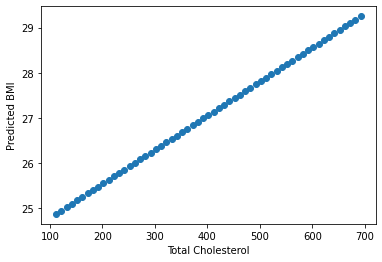

In [ ]:
plt.scatter(chol_range,Y1_predict)
plt.xlabel('Total Cholesterol')
plt.ylabel('Predicted BMI')

We can also insert a best fit line on the original data set using the `polyfit` function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Diastolic BP, mmHg')

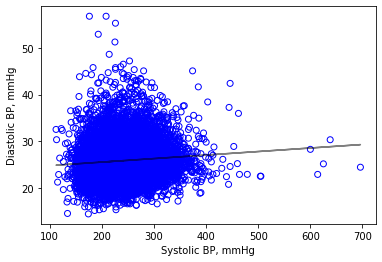

In [ ]:
plt.scatter(X,Y, edgecolors="b", c="")
b, m = polyfit(X,Y, 1)
plt.plot(X,m * X + b, '-', alpha=0.5, c="black")
plt.xlabel('Systolic BP, mmHg')
plt.ylabel('Diastolic BP, mmHg')

### Regression - Systolic and Diastolic BP

Create a linear model which uses systolic blood pressure to predict diastolic blood pressure. Plot the data points, the best fit line and find the linear regression equation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """Entry point for launching an IPython kernel.


(33.42091321548519, 0.3639623353747454)

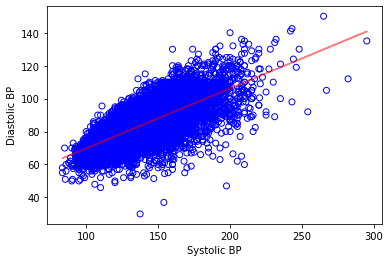

In [ ]:
plt.scatter(fram.SYSBP,fram.DIABP, edgecolors="b", c="")
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
b, m = polyfit(fram.SYSBP,fram.DIABP, 1)
plt.plot(fram.SYSBP ,m * fram.SYSBP + b, '-', alpha=0.5, c="red")
b, m

The equation for the best fit line is $DIABP=0.364*SYSBP + 33.421$. The positive slope indicates that diastolic blood pressure increases with systolic blood pressure. The  value of 0.506 indicates that there is a fairly strong linear relationship between the two variables.

### Multi-linear Regression

Most diseases and biomedical processes involve multiple parameters. In these instances, several variables may be needed to accurately predict the response variable. 

For example, BMI may be a function of age, sex, glucose, cholesterol and heart rate. The regress function can still be used for multi-linear regression models. To create a linear regression model with these variables, we will make a matrix containing all of the predictors plus the column of ones.



In [ ]:
XY_multi = pd.concat([pd.Series(np.ones_like(fram.AGE)), fram.AGE, fram.SEX, fram.TOTCHOL, fram.GLUCOSE, fram.HEARTRTE, fram.BMI], axis=1).dropna().values
X_multi = XY_multi[:, :-1]
Y_multi = XY_multi[:,-1]
x, residuals, rank, s = np.linalg.lstsq(X_multi, Y_multi.reshape(-1,1))
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([[ 2.23565303e+01],
       [ 1.48216697e-02],
       [-7.40942648e-01],
       [ 7.40358747e-03],
       [ 1.13040515e-02],
       [ 1.40750331e-02]])

What do the outputs of the regress function tell us about our model? These values are the regression weights and correspond to the effect of each independent variable on the dependent variable. 

Most of the features have positive correlations with BMI. We expect for BMI to increase with age, total cholesterol, glucose levels and heart rate. However, our model indicates that BMI decreases with the value for sex (1 for males, 2 for females). This suggests that on average, males have higher BMI than females.

### Multi-linear Regression - Assess Accuracy

To obtain more information about the linear regression model when using the regress command, use the stats option. This option provides the $r^2$ statistic, F-statistic, p-value, and estimated error variance.

Find the $r^2$ value for the single-variable and multi-variable regression models that we made for predicting BMI from total cholesterol.

In [ ]:
b2, residuals, rank, s = np.linalg.lstsq(X_ones, Y)
sklearn.metrics.r2_score(Y, X_ones @ b2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


0.007105692079757087

In [ ]:
b_multi, _, _, s_multi = np.linalg.lstsq(X_multi, Y_multi)
# X_ones
sklearn.metrics.r2_score(Y_multi, X_multi @ b_multi.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


0.023540890832140504

The $r^2$ value increased from 0.0064 to 0.0235 from the single-variable model to the multi-variable model. 

While both values are very low, it makes sense that the  value for the multi-variable linear regression is higher as we have more predicting factors for the BMI.

## Logistic Regression 
Logistic regression is used for discrete categorical data (in contrast to continuous data for linear regression).

Example – Classifying patients with diabetes versus those without diabetics.

Similar to the regress and fitlm functions, we can use the mnrfit function to predict diabetes from multiple variables. The mnrfit command returns a matrix of coefficient estimates for a multinomial logistic regression of the response variable based on the predictor variables.

Note that the response variable must be discrete, but the predictors can be continuous. We will start with just one predictor, blood glucose levels.

First, the diabetes data set must be converted to a categorical array.

In [ ]:
f = pd.concat([fram.GLUCOSE, fram.DIABETES], axis=1).dropna()
X, Y = f.GLUCOSE.to_numpy().reshape(-1,1), f.DIABETES.to_numpy().reshape(-1)
X_ = add_constant(X)
model = sm.MNLogit(Y, X_)
model_fit = model.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.118475
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                10187
Model:                        MNLogit   Df Residuals:                    10185
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.3377
Time:                        06:06:53   Log-Likelihood:                -1206.9
converged:                       True   LL-Null:                       -1822.2
Covariance Type:            nonrobust   LLR p-value:                1.427e-269
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5446      0.232    -36.758      0.000      -9.000      -8.089
x1             0.0565      0.

The value in b0 contains the intercept term for the realtive risk model. The value in b1 contains the slop correspoding to glucose levels. The model can be represented by the following equation:
$$\ln (\frac{\pi_{non-diabetic}}{\pi_{diabetic}})=-8.5446+0.0565X_1$$

**Note**: The result of Logistic Regression varies according to the configurations, like solvers, the number of iterations, regularization terms... So it is reasonable to have different results by different functions, like `LogisticRegression` and `mnrfit` in Matlab. Please don't mind if there is any inconsistency.

Now include glucose, BMI and total cholesterol in the predictor data set.


In [ ]:
XY = pd.concat([fram.GLUCOSE, fram.BMI, fram.TOTCHOL, fram.DIABETES], axis=1).dropna().values
X = XY[:, :-1]
X_ = add_constant(X)
Y = XY[:, -1].reshape(-1)
model = sm.MNLogit(Y, X_)
model_fit = model.fit()
print(model_fit.summary())
# X, X_

Optimization terminated successfully.
         Current function value: 0.114135
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                10021
Model:                        MNLogit   Df Residuals:                    10017
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.3532
Time:                        06:17:10   Log-Likelihood:                -1143.7
converged:                       True   LL-Null:                       -1768.3
Covariance Type:            nonrobust   LLR p-value:                1.556e-270
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6017      0.524    -20.219      0.000     -11.629      -9.574
x1             0.0567      0.

This model for relative risk can be represented by the following equation:

$$\ln (\frac{\pi_{non-diabetic}}{\pi_{diabetic}})=-10.6017+0.0567X_1+0.0670X_2+0.0009X_3$$

where $X_1$ is glucose, $X_2$ is BMI, and $X_3$ is total cholesterol.

Also, We typically look for a p-value below 0.05 for determining whether the hypothesis is significant or not. The last p-value, which corresponds to total cholesterol, is much greater than 0.05, indicating that this coefficient is not significant to the model. 


### Logistic Regression - forecasting for new data sets

We can use the `predict` function to evaluate the response variable (i.e. Diabetes) for new values of the predictor variables. The inputs for `predict` include the coefficient estimates we created with the `MNLogit` function and the values for the predictor variables that we want to analyze. The output of the function indicates the probability of belonging to each response category (Diabetic vs Non-Diabetic). 

Example: Predict if a person with Glucose = 90, BMI = 24, and Cholesterol = 200 has diabetes.

In [ ]:
x = [1, 94, 24, 200]
model_fit.predict(x)

array([[0.97006596, 0.02993404]])

Based on these results, a person with these BMI, cholesterol and glucose levels has a 2.4% chance of having diabetes. Keep in mind that only 530 of the 11627 patients in the data set (4.56%) are diabetic. 

Repeat the prediction for a person with the following characteristics: Glucose = 160, BMI = 29, Cholesterol = 200.

In [ ]:
x = [1, 160, 29, 200]
model_fit.predict(x)

array([[0.35505966, 0.64494034]])

As expected, this patient has higher BMI and glucose levels and therefore is much more likely (64.5%) to have diabetes.
Use the same method to predict whether a patient suffered a stroke during the study (1) or not (0) based on their age, systolic blood pressure and cigarettes smoked per day. We will look at two different patients with the following characteristics: 
 - **Patient 1**: Age = 50, Systolic Blood Pressure = 140, Cigarettes Smoked per Day = 6
 - **Patient 2**: Age = 30, Systolic Blood Pressure = 115, Cigarettes Smoked per Day = 0


In [ ]:
XY = pd.concat([fram.AGE,fram.SYSBP,fram.CIGPDAY, fram.STROKE], axis=1).dropna().values
X = XY[:, :-1]
X_ = add_constant(X)
Y = XY[:, -1].reshape(-1)
model = sm.MNLogit(Y, X_)
model_fit = model.fit()
model_fit.summary()


Optimization terminated successfully.
         Current function value: 0.279016
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                11548
Model:                        MNLogit   Df Residuals:                    11544
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 May 2021   Pseudo R-squ.:                 0.08660
Time:                        06:19:54   Log-Likelihood:                -3222.1
converged:                       True   LL-Null:                       -3527.6
Covariance Type:            nonrobust   LLR p-value:                4.236e-132
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3484      0.271    -30.761      0.000      -8.880      -7.817
x1             0.0548      0.004     13.733      0.000       0.047       0.063
x2             0.0197      0.001     14.328      0.000       0.017       0.022
x3             0.0125      0.003      4.474      0.000       0.007       0.018
==============================================================================
"""

In [ ]:
x1 = [1, 50,140,6];
prob_stroke_1 = model_fit.predict(x1)
prob_stroke_1

array([[0.94113806, 0.05886194]])

In [ ]:
x2 = [1, 30, 115, 0];
prob_stroke_2 = model_fit.predict(x2)
prob_stroke_2

array([[0.98829563, 0.01170437]])

As we might expect, Patient 2 has a lower probability (1.17%) of having suffered a stroke compared to Patient 1 (5.89%) due to their lower age, blood pressure and cigarette-use.

### Polynomial Regression
The polyfit function is similar to regress, however it is more general in that polyfit can be used for linear, quadratic or polynomial models. The function returns the coefficients in descending powers and their length is n+1 (where n is the polynomial degree).

Create a first order model for systolic and diastolic blood pressure.

In [ ]:
p = polyfit(fram.SYSBP.to_numpy(),fram.DIABP.to_numpy(),1)
p = np.flip(p)
p

array([ 0.36396234, 33.42091322])

These coefficients represent the following best fit equation: 
$$p(x)=0.364x + 33.42$$
We can use the polyval function to plot the calculate the polynomial's value, $p$, at each point, $x$. Plot the original blood pressure data and the first-order best fit line on the same graph.

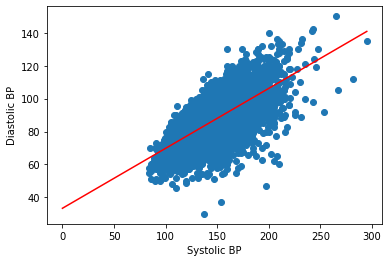

In [ ]:
x1 = np.linspace(0,np.max(fram.SYSBP.to_numpy()), 100)
y1 = np.polyval(p,x1)
plt.scatter(fram.SYSBP,fram.DIABP)
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
plt.plot(x1,y1, c='r')


Use `polyfit` once again, this time to create a quadratic model of the systolic and diastolic blood pressure relationship.


In [ ]:
p2 = polyfit(fram.SYSBP,fram.DIABP,2)
p2 = np.flip(p2)
p2

array([-1.29200222e-03,  7.43925805e-01,  6.30513583e+00])

These coefficients form the following quadratic equation: 
$$ px(x)=-0.0013x^2 + 0.7439x + 6.305 $$
Add this best fit line to the previous plot.

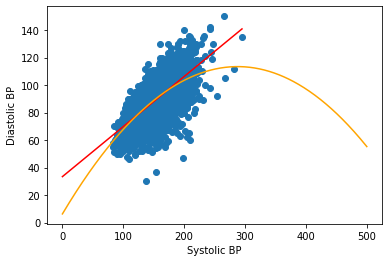

In [ ]:
plt.scatter(fram.SYSBP,fram.DIABP)
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
plt.plot(x1,y1, c='r')

x2 = np.linspace(0, 500, 500)
y2 = np.polyval(p2, x2)
plt.plot(x2,y2, color="orange")
